In [1]:
import pandas as pd
from utilities_DL import get_DataSet_and_invalid_dates,get_MultiModel_loss_args_emb_opts
from DL_class import MultiModelTrainer
from config import get_args
from plotting import plot_k_fold_split
from save_results import update_results_df
from paths import folder_path,file_name,get_save_directory

Training and Hyper-parameter tuning with Ray is not possible


# Get Parameters : 

In [2]:
# Load config
model_name =  'CNN' #'STGCN'
args = get_args(model_name)
#args = get_args(model_name = model_name,learn_graph_structure = True)  # MTGNN

# Modification : 
args.epochs = 1
args.K_fold = 1

# Save Directory:
main_dir = get_save_directory(args)

## Define fixed Dataset K_fold split for each trial: 

coverage period: 2019-01-01 00:00:00 - 2020-01-01 00:00:00
Time-step per hour: 4.0


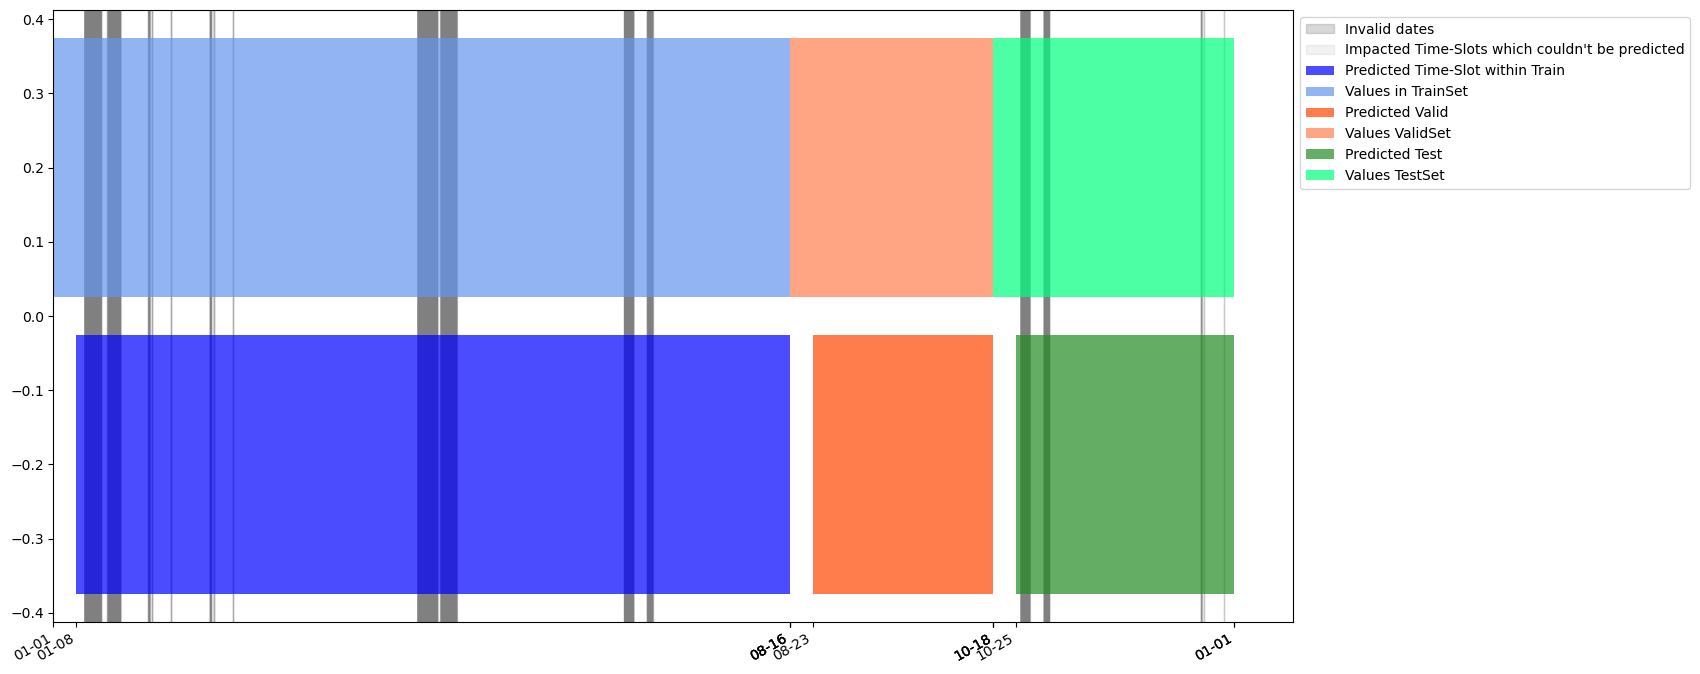

In [3]:
# Load dataset and invalid_dates
dataset,invalid_dates = get_DataSet_and_invalid_dates(folder_path,file_name,args.W,args.D,args.H,args.step_ahead,single_station = False)

# Train / Valid / Test split and Normalize for K-fold 
(Datasets,DataLoader_list,time_slots_labels_list,dic_class2rpz,dic_rpz2class,nb_words_embedding) =  dataset.split_K_fold(args,invalid_dates)

# Plot information about split and folds:
plot_k_fold_split(Datasets,invalid_dates)

# Test complet sur les 3 Top STGCN, avec sauvegarde du model :

In [4]:
results_df = pd.DataFrame()

#for i,(calendar_class,position,specific_lr, type_calendar) in enumerate(zip([3,1,3],['input','input','input'],[True,True,False],['tuple','tuple','tuple'])):
for i,(calendar_class,position,specific_lr, type_calendar) in enumerate(zip([3],['input'],[True],['tuple'])):

    args.calendar_class = calendar_class
    args.position = position
    args.specific_lr = specific_lr
    args.type_calendar = type_calendar

    save_dir = get_save_directory(args)

    # Load dataset and invalid_dates 
    dataset,invalid_dates = get_DataSet_and_invalid_dates(folder_path,file_name,args.W,args.D,args.H,args.step_ahead,single_station = False)
    (Datasets,DataLoader_list,time_slots_labels,dic_class2rpz,dic_rpz2class,nb_words_embedding) =  dataset.split_K_fold(args,invalid_dates)
    
    # Load associated K_folds Models: 
    (loss_function,Model_list,Optimizer_list,args_embedding) = get_MultiModel_loss_args_emb_opts(args,nb_words_embedding,dic_class2rpz)
    multimodeltrainer = MultiModelTrainer(Datasets,Model_list,DataLoader_list,args,Optimizer_list,loss_function,scheduler = None,args_embedding=args_embedding,ray= False,save_dir = save_dir,dic_class2rpz=dic_class2rpz)
    (mean_picp,mean_mpiw,dict_last_from_mean_of_folds,dict_best_from_mean_of_folds) = multimodeltrainer.K_fold_validation()

    # Svae results 
    results_df = update_results_df(results_df,args, mean_picp,mean_mpiw,dict_last_from_mean_of_folds,dict_best_from_mean_of_folds,i)
                            
results_df.to_csv('save_results.csv')
results_df

coverage period: 2019-01-01 00:00:00 - 2020-01-01 00:00:00
Time-step per hour: 4.0


K_fold 0
start training


c:\Users\romai\.conda\envs\torch_gpd\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([6038, 40, 1])) that is different to the input size (torch.Size([6038, 40, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\romai\.conda\envs\torch_gpd\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([6038, 40, 1])) that is different to the input size (torch.Size([6038, 40, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Loading BokehJS ...

epoch: 0 
 min\epoch : 0.05


c:\Users\romai\Code\prediction-validation\DL_class.py:114: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\b\abs_6fueooay2f\croot\pytorch-select_1707342446212\work\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std_of_lasts_train_loss =  self.Loss_train.std(dim = 0)[-1]
c:\Users\romai\Code\prediction-validation\DL_class.py:116: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\b\abs_6fueooay2f\croot\pytorch-select_1707342446212\work\aten\src\ATen\native\ReduceOps.cpp:1760.)
  std_of_lasts_valid_loss =  self.Loss_train.std(dim = 0)[-1]
c:\Users\romai\Code\prediction-validation\DL_class.py:132: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (

,CalendarClass,Position,Specific_lr,Type_calendar,PICP_mean,MPIW_mean,mean_last_train_loss,std_of_lasts_train_loss,mean_last_valid_loss,std_of_lasts_valid_loss,best_mean_train_loss,std_of_best_mean_train_loss,best_mean_valid_loss,std_of_best_mean_valid_loss
0,3,input,True,tuple,0.93196,0.401208,0.029446,NaN,0.027475,NaN,0.029446,NaN,0.027475,NaN
